In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df =pd.read_csv('/content/spend_analysis_dataset.csv')
df.sample(5)

,TransactionID,ItemName,Category,Quantity,UnitPrice,TotalCost,PurchaseDate,Supplier,Buyer
129,TXN130,Laptop Bag,Accessories,10,26.48,264.80,2024-04-20,CloudSoft Corp.,Luis Holland
277,TXN278,Monitor,Electronics,12,253.77,3045.24,2024-02-28,FurniWorks Ltd.,Barry Johnson
374,TXN375,Printer Ink,Stationery,4,19.92,79.68,2024-06-11,TechMart Inc.,Kevin Adams
387,TXN388,Annual Software License,Software,1,5284.47,5284.47,2024-07-19,CloudSoft Corp.,Lisa Parks
20,TXN021,Stapler,Office Supplies,3,13.02,39.06,2024-05-26,CloudSoft Corp.,Dawn Padilla


In [43]:
df.shape

(500, 9)

In [44]:
df['UnitPrice'].describe()

,UnitPrice
count,500.000000
mean,854.245100
std,2132.890832
min,1.060000
25%,14.380000
50%,143.595000
75%,287.925000
max,9909.240000


<ipython-input-45-0cb328187ed8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UnitPrice'])


<Axes: xlabel='UnitPrice', ylabel='Density'>

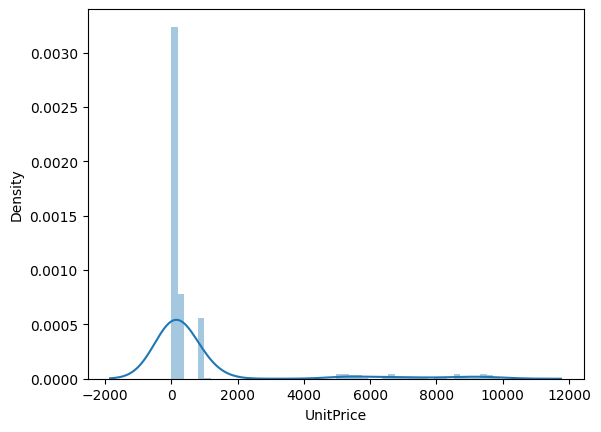

In [45]:
sns.distplot(df['UnitPrice'])

<Axes: ylabel='UnitPrice'>

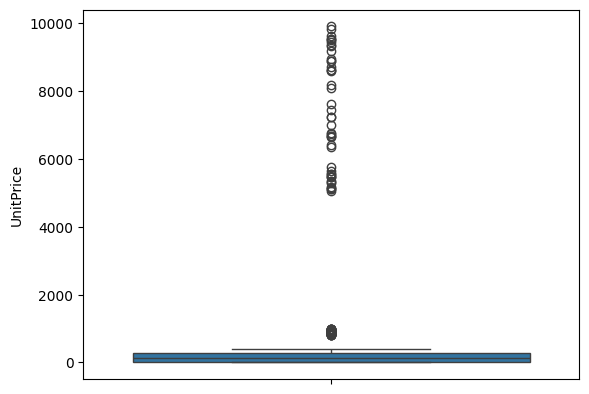

In [46]:
sns.boxplot(df['UnitPrice'])

In [47]:
upper_limit = df['UnitPrice'].quantile(0.99)
upper_limit

np.float64(9504.0766)

In [48]:
lower_limit = df['UnitPrice'].quantile(0.01)
lower_limit

np.float64(1.2895)

In [49]:
df[(df['UnitPrice'] >= 9504.0766) | (df['UnitPrice'] <= 1.2895 )]

,TransactionID,ItemName,Category,Quantity,UnitPrice,TotalCost,PurchaseDate,Supplier,Buyer
24,TXN025,Notepad,Stationery,18,1.15,20.70,2024-05-21,QuickDeliver Ltd.,Lisa Parks
98,TXN099,Annual Software License,Software,1,9534.43,9534.43,2024-04-29,FurniWorks Ltd.,Stephanie Bennett
174,TXN175,Annual Software License,Software,1,9836.53,9836.53,2024-11-26,TechMart Inc.,Amy Warner
183,TXN184,Annual Software License,Software,1,9909.24,9909.24,2024-06-20,OfficeSupplies Co.,Melissa Mckee
191,TXN192,Notepad,Stationery,13,1.06,13.78,2024-07-29,CloudSoft Corp.,Dawn Padilla
298,TXN299,Notepad,Stationery,11,1.23,13.53,2024-07-25,QuickDeliver Ltd.,Lisa Parks
323,TXN324,Notepad,Stationery,3,1.06,3.18,2024-07-14,OfficeSupplies Co.,Dawn Padilla
338,TXN339,Annual Software License,Software,1,9622.40,9622.40,2024-06-15,QuickDeliver Ltd.,Cynthia Jenkins
394,TXN395,Annual Software License,Software,1,9550.05,9550.05,2024-05-12,FurniWorks Ltd.,Rebecca Bell
486,TXN487,Notepad,Stationery,12,1.24,14.88,2024-08-27,OfficeSupplies Co.,Lisa Parks


In [56]:
new_df = df[(df['UnitPrice'] >= 9504.0766) & (df['UnitPrice'] >= 1.2895)]

In [57]:
new_df['UnitPrice'].describe()

,UnitPrice
count,5.000000
mean,9690.530000
std,171.678188
min,9534.430000
25%,9550.050000
50%,9622.400000
75%,9836.530000
max,9909.240000


In [58]:
df['UnitPrice'].describe()

,UnitPrice
count,500.000000
mean,854.245100
std,2132.890832
min,1.060000
25%,14.380000
50%,143.595000
75%,287.925000
max,9909.240000


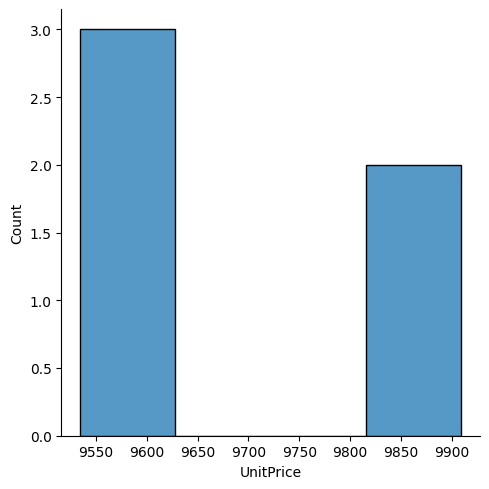

In [59]:
sns.displot(new_df['UnitPrice'])

<Axes: ylabel='UnitPrice'>

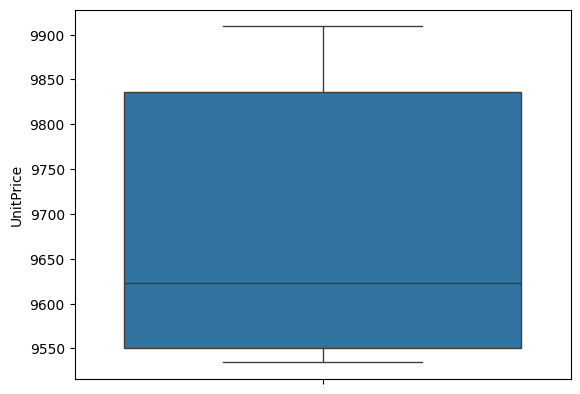

In [60]:
sns.boxplot(new_df['UnitPrice'])

# **Now capping --> Winsorization**

In [85]:
df['UnitPrice'] = np.where (df['UnitPrice'] >= upper_limit,
                            upper_limit,
                            np.where(df['UnitPrice'] <= lower_limit,
                                     lower_limit,
                                     df['UnitPrice']))

In [86]:
df.shape

(500, 9)

In [87]:
df['UnitPrice'].describe()

,UnitPrice
count,5.000000e+02
mean,9.504077e+03
std,4.916190e-11
min,9.504077e+03
25%,9.504077e+03
50%,9.504077e+03
75%,9.504077e+03
max,9.504077e+03


<Axes: ylabel='UnitPrice'>

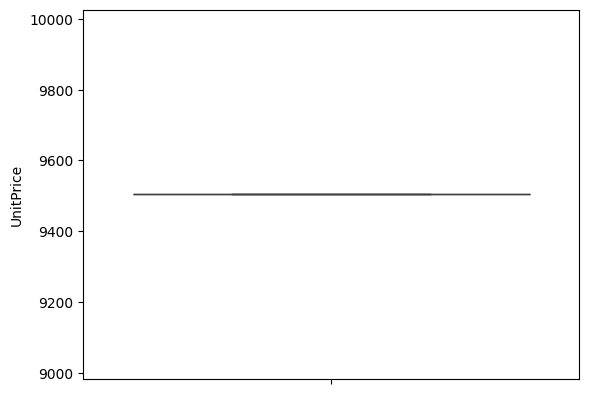

In [88]:
sns.boxplot(df['UnitPrice'])

<ipython-input-84-0cb328187ed8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UnitPrice'])


<Axes: xlabel='UnitPrice', ylabel='Density'>

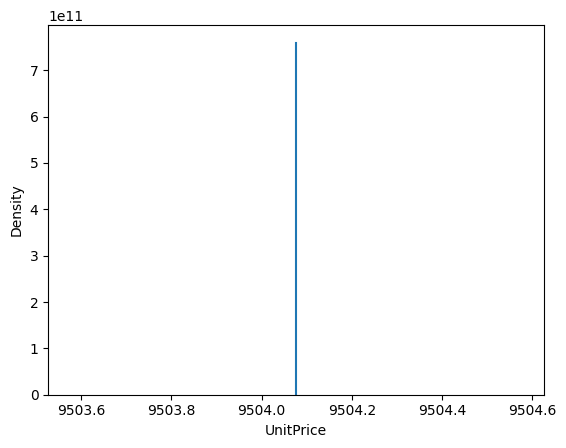

In [84]:
sns.distplot(df['UnitPrice'])